In [14]:
# Import the required modules
import cv2
import os

import glob
import random


import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [65]:
  def get_images_and_labels():
    # Append all the absolute image paths in a list image_paths
    image_paths = glob.glob("./imdb_crop/[0-9]*/*.jpg")[:9]

    # to hold face images
    images = []

    # to hold the label that is assigned to the image
    labels = []
    fig = plt.figure(figsize=(2.5,3.5))
    for image_path in image_paths:
        # Read the image and convert to grayscale
        image_pil = Image.open(image_path).convert('L')
        # Convert the image format into numpy array
        image = np.array(image_pil, 'uint8')
        # Get the label of the image
        nbr_str = image_path.split('/')[3].split('_')[0]
        nbr = int(nbr_str[2:])
        
        # Detect the face in the image
        faces = faceCascade.detectMultiScale(image)
        # If face is detected, append the face to images and the label to labels
        for (x, y, w, h) in faces:
            images.append(image[y: y + h, x: x + w])
            labels.append(nbr)
            #cv2.imshow("Adding faces to traning set...", image[y: y + h, x: x + w])
            #cv2.waitKey(1)
    # return the images list and labels list
    return images, labels

In [66]:
# Call the get_images_and_labels function and get the face images and the 
# corresponding labels
images, labels = get_images_and_labels()
#cv2.destroyAllWindows()

In [74]:
# For face detection we will use the Haar Cascade provided by OpenCV.
cascadePath = "/Users/nlabh/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

# For face recognition we will the the LBPH Face Recognizer 
recognizer = cv2.face.createLBPHFaceRecognizer()

# Perform the tranining
%time recognizer.train(images, np.array(labels))

CPU times: user 18.9 ms, sys: 804 µs, total: 19.7 ms
Wall time: 9.56 ms


In [76]:
type(recognizer)

cv2.face_LBPHFaceRecognizer

In [77]:
# save the fitted model
recognizer.save("face_recognizer_model.save")

In [78]:
# load back the saved model
clf = cv2.face.createLBPHFaceRecognizer()
clf.load("face_recognizer_model.save")

./imdb_crop/00/nm0000100_rm1019451648_1955-1-6_2003.jpg
./imdb_crop/00/nm0000100_rm103389184_1955-1-6_2005.jpg
Recognozed label:  100
./imdb_crop/00/nm0000100_rm1035123712_1955-1-6_2011.jpg


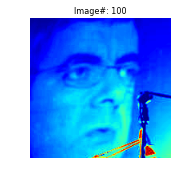

In [79]:
# pick a random subset of images
image_paths = glob.glob("./imdb_crop/[0-9]*/*.jpg")[3:6]
for image_path in image_paths:
    predict_image_pil = Image.open(image_path).convert('L')
    predict_image = np.array(predict_image_pil, 'uint8')
    print(image_path)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        predict_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    fig = plt.figure(figsize=(2.5,3.5))
    for i, (x, y, w, h) in enumerate(faces):
        predict_im_face = predict_image[y: y + h, x: x + w]
        nbr_predicted = clf.predict(predict_im_face)
        #nbr_actual = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
        nbr_str = image_path.split('/')[3].split('_')[0]
        nbr_actual = int(nbr_str[2:])
        if nbr_actual == nbr_predicted:
            print("Recognozed label: ", nbr_predicted)
        else:
            print("Not recognozed for label: ", nbr_actual)
        label = 'Image#: ' + str(nbr_actual)
        imgplot = fig.add_subplot(1,1,i+1)
        imgplot.imshow(predict_im_face)
        imgplot.set_title(label, fontsize=8)
        imgplot.axis('off')

In [3]:
from scipy.io import loadmat

mat = loadmat('imdb_crop/imdb.mat')

In [87]:
num_entries = len( mat['imdb'][0][0][4][0] ) 

In [84]:
from skimage import io
import math

def get_image_details(image_number):
    gender_list = ['NaN', 'Female', 'Male']

    fig = plt.figure(figsize=(20,28))
    j = image_number

    jpg_file = mat['imdb'][0][0][2][0][j][0]
    img_url = 'imdb_crop/' + jpg_file
    im_face = io.imread(img_url)
    im_length = len(im_face.shape)

    if im_length < 3:
        del(im_face)
        return
    #else:
    #    print(image_number, im_face.shape, len(im_face.shape))

    name = mat['imdb'][0][0][4][0][j][0]
    dob = jpg_file.split('_')[2]
    gender_index =  0 if (math.isnan(mat['imdb'][0][0][3][0][j]) == True) else (int(mat['imdb'][0][0][3][0][j])+1)
    gender = gender_list[gender_index]
        
    label = name + ' [' + str(j) + ']' + ' - Gender: ' + gender + ';dob: ' + dob

    imgplot = fig.add_subplot(1,3,1)
    imgplot.imshow(im_face)
    imgplot.set_title(label, fontsize=12)
    imgplot.axis('off')

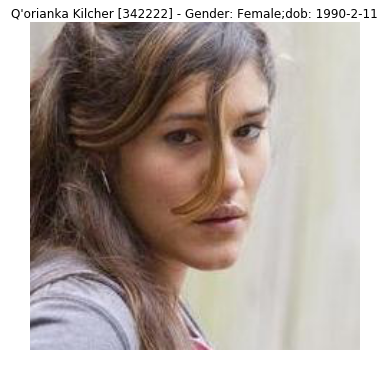

In [93]:
i = random.randrange(0,num_entries)
get_image_details(i)

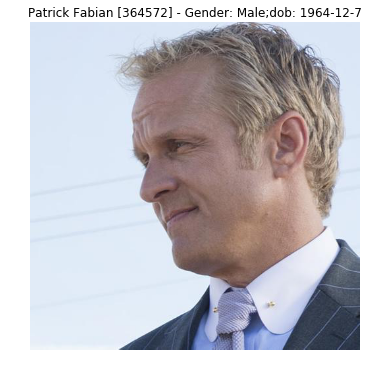

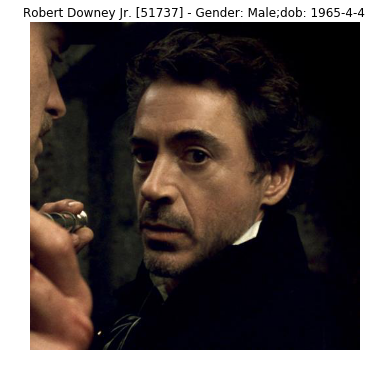

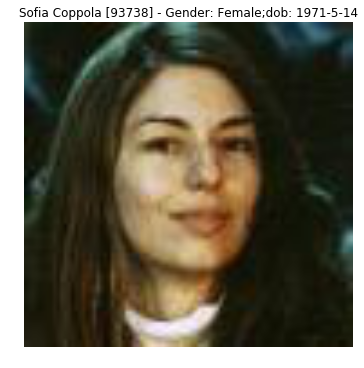

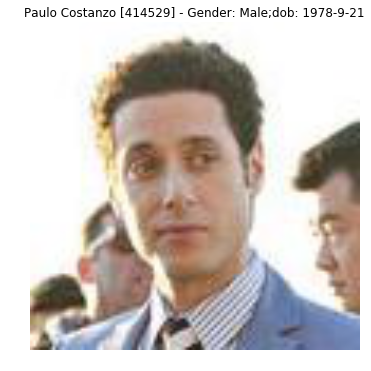

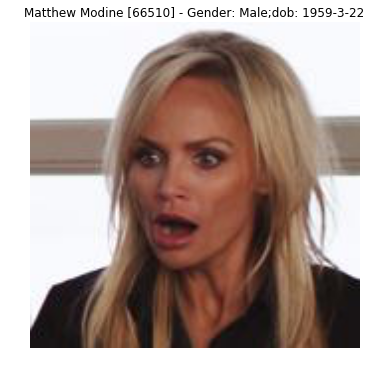

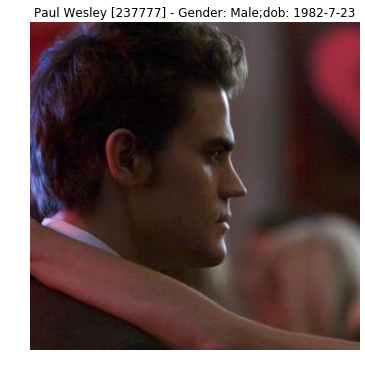

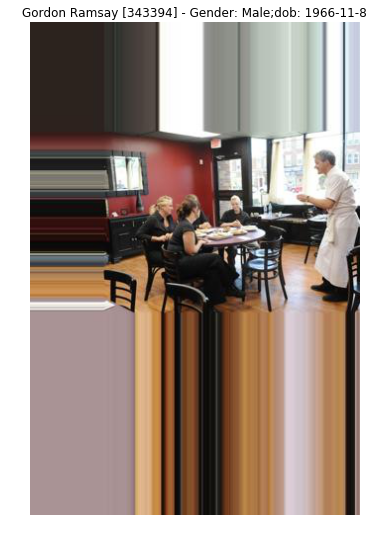

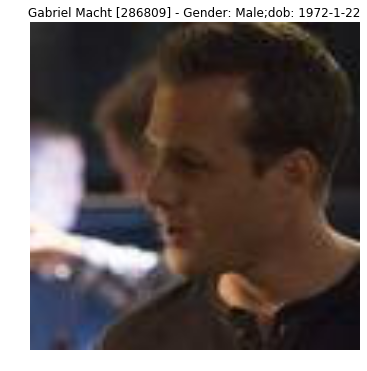

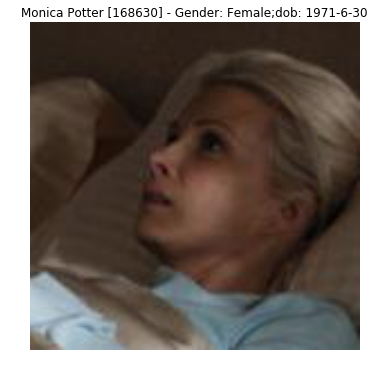

In [95]:

for i in range(10):
    inum = random.randrange(0,num_entries)
    get_image_details(inum)